In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(columns = ["Unnamed: 32","id"], inplace = True, axis =1 )

In [5]:
data = data.rename(columns ={"diagnosis": "target"})

B    357
M    212
Name: target, dtype: int64


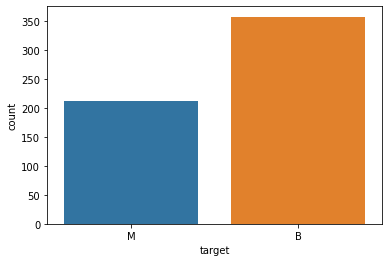

In [6]:
#count and plot target
sns.countplot(data["target"]);
print(data.target.value_counts())

In [7]:
#change string target type to numeric
data["target"] = [1 if i.strip()=="M" else 0 for i in data.target]

In [8]:
len(data)

569

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
describe = data.describe()
describe

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
#EDA

In [12]:
corr_mat = data.select_dtypes("number").corr()

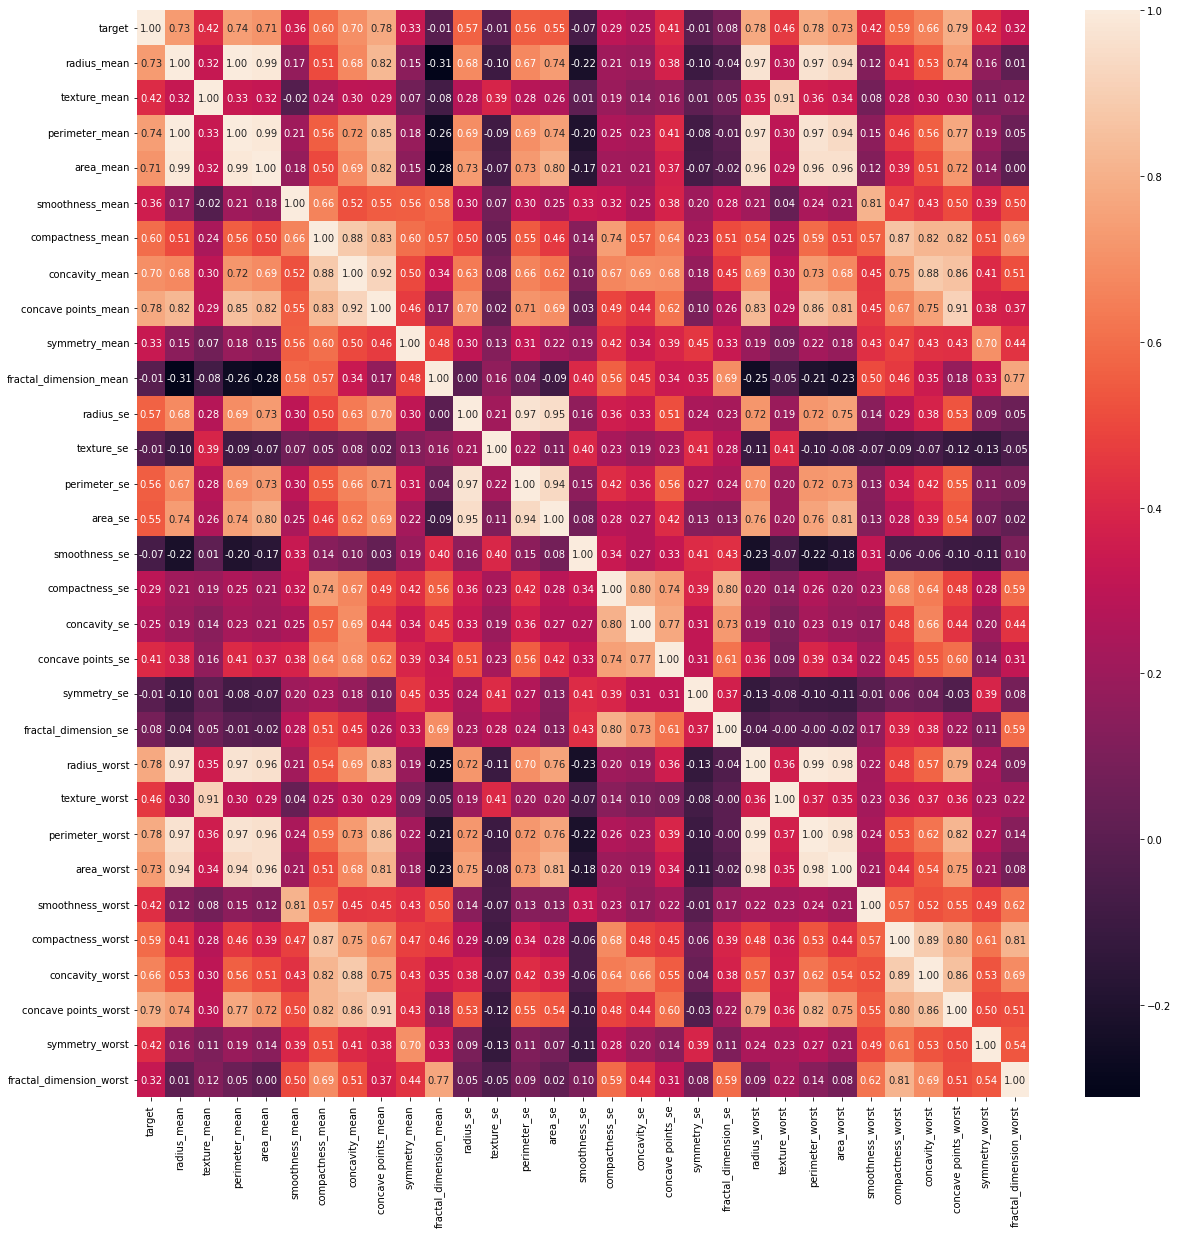

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot = True, fmt = ".2f");

In [14]:
#it is hard to see above, let us make another one with 0.75 treshold (features that has more than 0.75 corr with target)

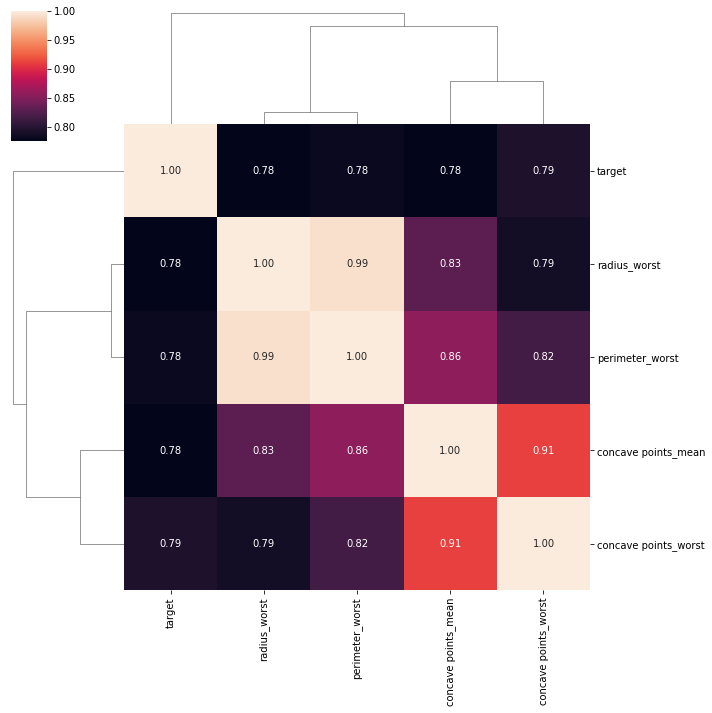

In [15]:
treshold = 0.75
filter = np.abs(corr_mat["target"])>treshold
corr_feat = corr_mat.columns[filter].to_list()
sns.clustermap(data[corr_feat].corr(), annot =True, fmt = ".2f");

In [16]:
data.drop(columns= ["radius_worst","perimeter_worst","concave points_mean"], inplace = True)

In [17]:
data.shape

(569, 28)

In [18]:
#Outlier detection

In [19]:
y = data.target
X = data.drop(columns ="target", axis = 1)

In [20]:
columns = X.columns.to_list()

In [21]:
#this code checks whether it is outlier or not
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(X)
y_pred[:5]

array([ 1,  1,  1, -1,  1])

In [22]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
X_score[:5]

array([-1.4222242 , -1.06732347, -0.98059753, -1.55120455, -1.0733691 ])

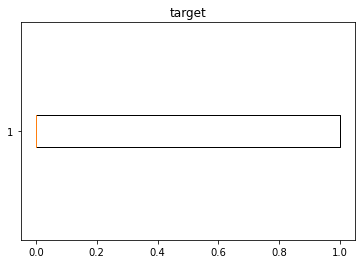

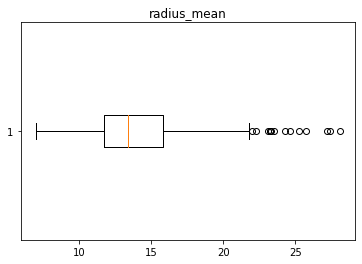

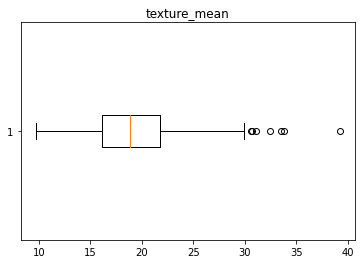

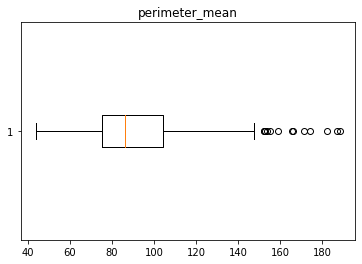

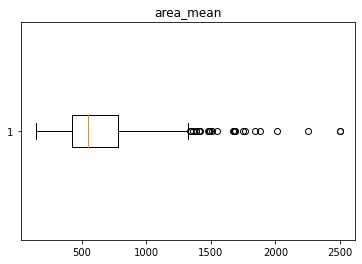

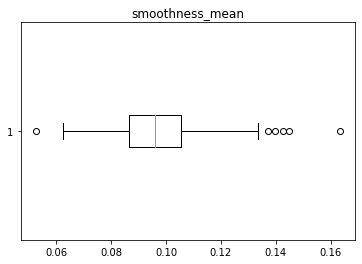

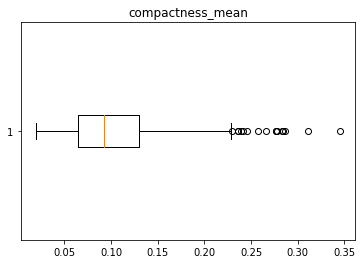

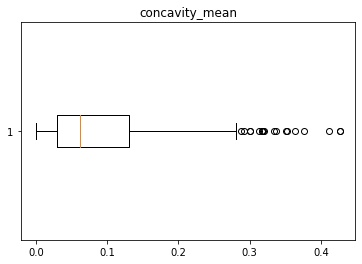

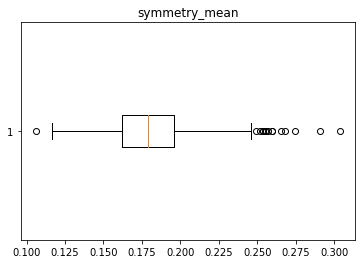

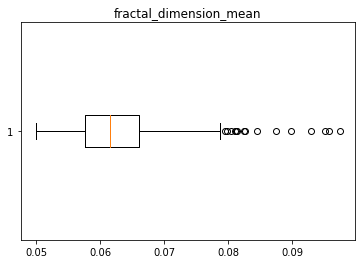

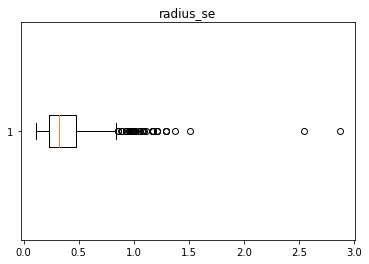

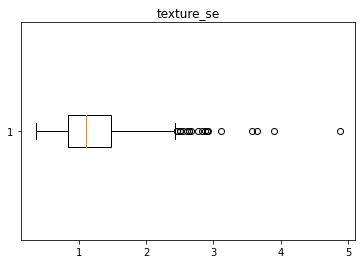

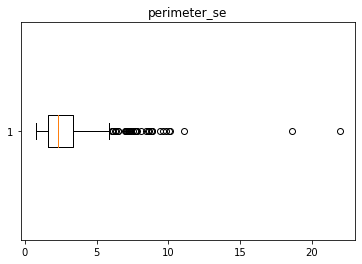

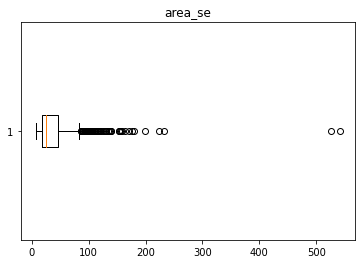

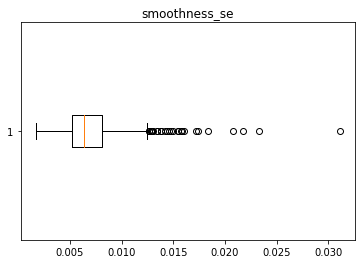

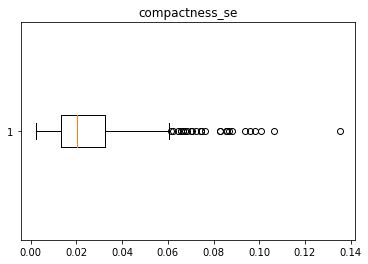

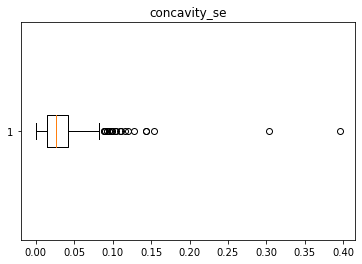

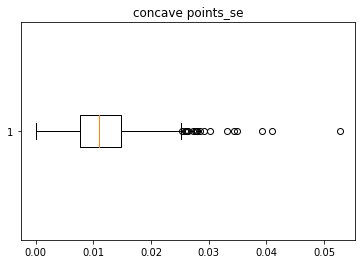

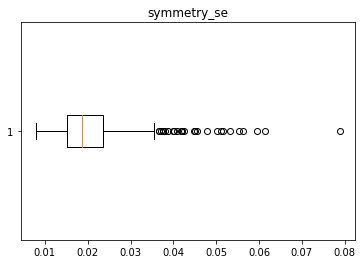

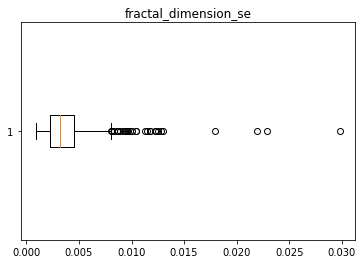

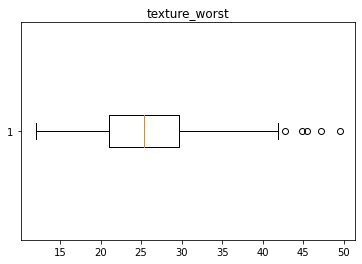

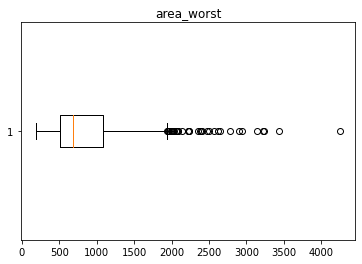

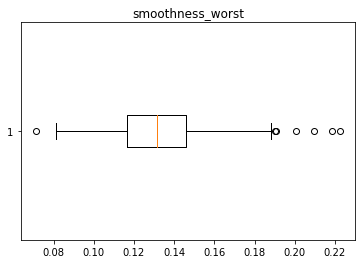

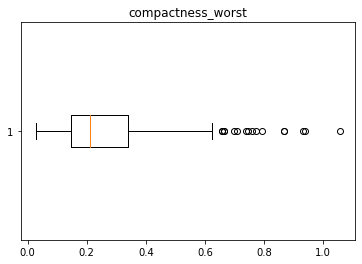

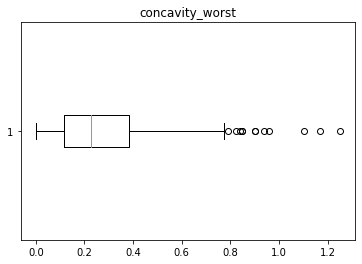

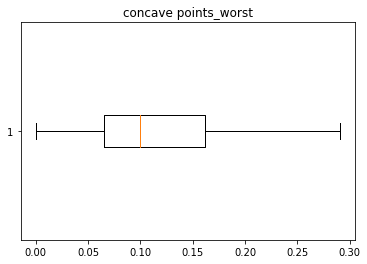

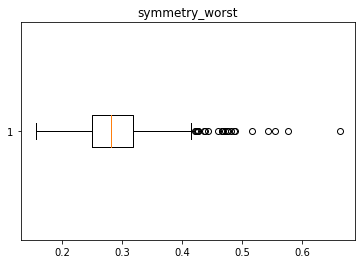

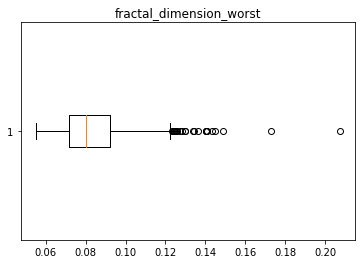

In [23]:
#we can also check outliers as below:
for i in data.select_dtypes("number").columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.boxplot(data[i], vert = False);

In [24]:
def outliers(data, ft):
    Q1 = data[ft].quantile(0.25)
    Q3 = data[ft].quantile(0.75)
    IQR = Q3-Q1
    
    low = Q1 - 1.5 * IQR
    top = Q3 + 1.5 * IQR
    
    ls = data.index[ (data[ft] < low ) |  (data[ft]  > top) ]
    return ls

In [25]:
index_list = []
for i in ["radius_mean", "texture_mean","perimeter_mean", "area_mean", "radius_se","perimeter_se",
         "texture_se", "area_se","area_worst", "symmetry_worst","fractal_dimension_worst"]:
    index_list.extend(outliers(data, i))

In [26]:
def remove (data, ls):
    ls = sorted(set(ls))
    df = data.drop(ls)
    return df

In [27]:
data = remove(data, index_list)

In [28]:
#for i in data.select_dtypes("number").columns:
    
   # plt.figure()
    #plt.title(f'{i}')
    #plt.boxplot(data[i], vert = False);

In [29]:
#TRAIN TEST SPLIT

In [30]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.3, random_state=42)

In [31]:
#Standardization

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train_df = pd.DataFrame(X_train, columns = columns)

In [34]:
X_train_df.describe()
#now we can see that mean is 0 and std is 1 thanks to standardization

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,2.677925e-16,-5.534378e-16,-6.181543e-16,2.075392e-16,8.926416e-18,-9.595897e-17,-2.097708e-16,7.252713e-16,2.800663e-16,1.227382e-16,...,9.149577e-17,3.793727e-17,-1.986128e-16,-1.651387e-16,9.104945e-16,-1.740651e-16,1.294330e-16,8.703256e-17,-2.733715e-16,1.428227e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.836464e+00,-2.245111e+00,-1.810311e+00,-1.365377e+00,-2.433051e+00,-1.640911e+00,-1.132915e+00,-2.370161e+00,-1.754890e+00,-1.011036e+00,...,-1.560060e+00,-1.093859e+00,-2.243853e+00,-1.154748e+00,-2.197162e+00,-1.446868e+00,-1.370635e+00,-1.784161e+00,-2.117613e+00,-1.628809e+00
25%,-6.863161e-01,-7.102232e-01,-6.781539e-01,-6.517481e-01,-7.572809e-01,-7.800619e-01,-7.523426e-01,-6.980367e-01,-6.905392e-01,-5.813376e-01,...,-6.460316e-01,-5.814297e-01,-7.380288e-01,-6.320618e-01,-7.587574e-01,-6.855591e-01,-7.760495e-01,-7.829110e-01,-6.511070e-01,-7.077340e-01
50%,-2.551700e-01,-1.090984e-01,-2.587218e-01,-3.167308e-01,-9.722838e-02,-2.350839e-01,-3.369099e-01,-5.620170e-02,-1.849553e-01,-2.943551e-01,...,-2.095013e-01,-2.161913e-01,-5.832825e-02,-3.407646e-01,-2.705181e-02,-2.683733e-01,-2.159212e-01,-2.283327e-01,-1.213010e-01,-1.927549e-01
75%,5.419902e-01,5.692460e-01,5.510809e-01,3.839945e-01,6.191923e-01,5.332330e-01,5.017380e-01,5.679340e-01,4.618745e-01,2.217825e-01,...,3.047800e-01,2.713282e-01,6.496585e-01,3.147198e-01,6.187627e-01,6.232624e-01,5.931956e-01,7.297391e-01,4.394337e-01,4.691161e-01
max,3.945850e+00,4.780684e+00,3.967339e+00,5.137153e+00,4.904988e+00,4.068820e+00,4.357306e+00,4.608979e+00,4.803888e+00,8.508511e+00,...,5.131905e+00,9.838817e+00,3.999076e+00,5.915678e+00,3.767380e+00,4.640507e+00,3.241075e+00,2.535233e+00,6.033124e+00,5.113359e+00


In [35]:
X_train_df["target"] = y_train
data_melted = pd.melt(X_train_df,id_vars = "target",var_name="features",value_name="value")

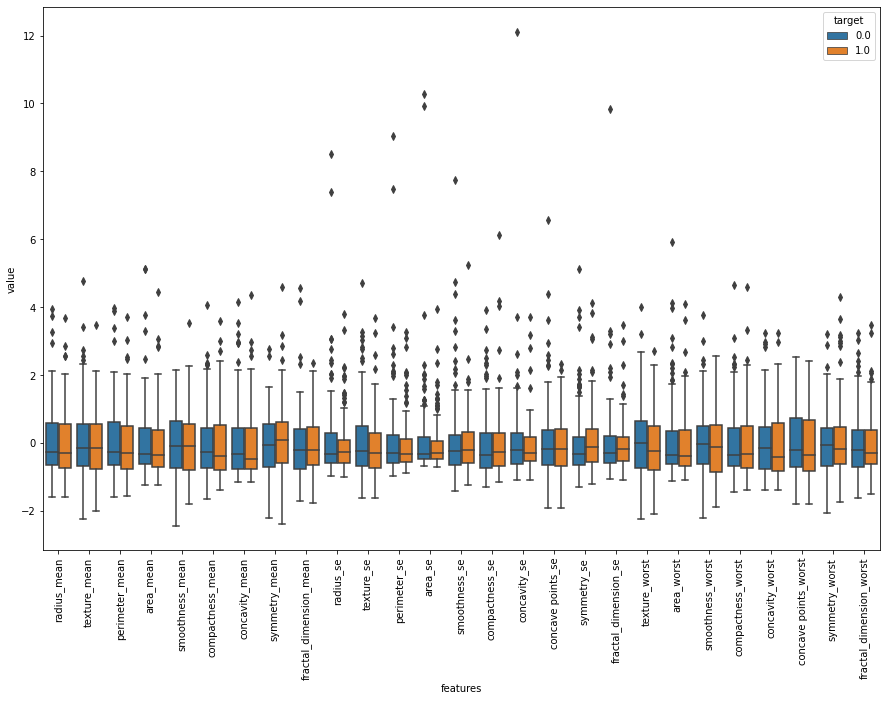

In [36]:
plt.figure( figsize =(15,10))
sns.boxplot(x="features",y="value",hue="target",data=data_melted)
plt.xticks(rotation =90)
plt.show()

In [37]:
# if our model do not perform well,we can re-work and remove outliers later

In [38]:
# we will use KNN algorityhm because the data is not too much imbalanced

In [39]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)
score = knn.score(X_test,y_test)
print("cm:",cm)
print("score:",score)
print("knn acc:",acc)

cm: [[107   1]
 [  9  54]]
score: 0.9415204678362573
knn acc: 0.9415204678362573


In [40]:
# above output shows us that we had 108 benign canser and we predicted them all correct except 1
# and we had 63 malignant cancer and we predicted 54 of them correctly

In [41]:
#KNN Tune (Best Parameters)

In [42]:
def knn_best_params(X_train,X_test,y_train,y_test):
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    #to grid search we need to add those values in a dict
    param_grid = dict(n_neighbors = k_range,weights = weight_options)
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn,param_grid, cv = 10, scoring = "accuracy")
    grid.fit(X_train,y_train)
    print("Best Training Score: {} with parameters {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(X_train,y_train)
    
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train) #are there any overfitting or underfitting
    
    cm_test = confusion_matrix(y_test,y_pred_test)
    cm_train = confusion_matrix(y_train,y_pred_train)
    
    acc_test = accuracy_score(y_test,y_pred_test)
    acc_train = accuracy_score(y_train,y_pred_train)
    print("Test Score:{}, Train Score:{}".format(acc_test,acc_train))
    print()
    print("CM Test:", cm_test)
    print("CM Train:", cm_train)
    
    return grid
    


    

In [43]:
grid = knn_best_params(X_train,X_test,y_train,y_test)


Best Training Score: 0.9648717948717949 with parameters {'n_neighbors': 8, 'weights': 'distance'}

Test Score:0.9590643274853801, Train Score:1.0

CM Test: [[105   3]
 [  4  59]]
CM Train: [[249   0]
 [  0 149]]


In [44]:
#PCA 

In [45]:
#with pca we can reduce 30 dimension into 2 (unsupervised(no need target variable))
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

<AxesSubplot:xlabel='p1', ylabel='p2'>

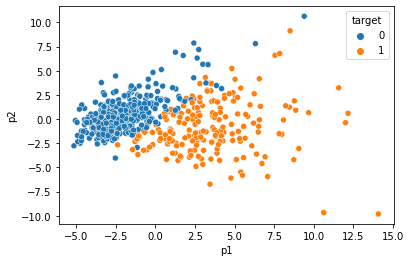

In [46]:
pca = PCA(n_components = 2)
pca.fit(x_scaled)
x_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(x_reduced_pca, columns = ["p1","p2"])
pca_data["target"] =y
sns.scatterplot(x="p1", y="p2", hue="target", data =pca_data)

In [47]:
#use pca for knn

In [48]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(x_reduced_pca,y,test_size =0.3, random_state=42)

In [49]:
grid_pca = knn_best_params(X_train_pca,X_test_pca,y_train_pca,y_test_pca)


Best Training Score: 0.9321794871794872 with parameters {'n_neighbors': 17, 'weights': 'uniform'}

Test Score:0.9473684210526315, Train Score:0.9346733668341709

CM Test: [[106   2]
 [  7  56]]
CM Train: [[241   8]
 [ 18 131]]


In [50]:
#NCA - supervised ( need target variable(y))

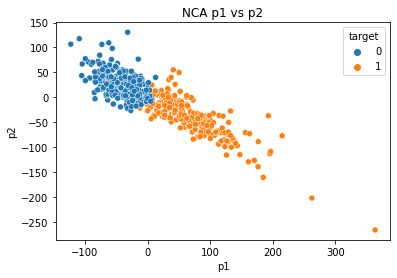

In [51]:
nca = NeighborhoodComponentsAnalysis(n_components =2, random_state =42)
nca.fit(x_scaled, y)
x_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(x_reduced_nca,columns = ["p1","p2"])
nca_data["target"] = y
sns.scatterplot(x= "p1", y="p2", hue="target", data = nca_data)
plt.title("NCA p1 vs p2");

In [52]:
# as you can see above plt nca gives better solution than pca (dots are seperated)
#however, let us see the result with knn

In [53]:
X_train_nca,X_test_nca,y_train_nca,y_test_nca = train_test_split(x_reduced_nca,y,test_size =0.3, random_state=42)

In [54]:

grid_nca = knn_best_params(X_train_nca,X_test_nca,y_train_nca,y_test_nca)


Best Training Score: 0.99 with parameters {'n_neighbors': 7, 'weights': 'uniform'}

Test Score:0.9941520467836257, Train Score:0.992462311557789

CM Test: [[108   0]
 [  1  62]]
CM Train: [[249   0]
 [  3 146]]


In [55]:
#Our model is more accurate now , only 1 sample predicted wrong, 0.99 accuracy